In [1]:
import matplotlib.pyplot as plt
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))

In [2]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255.)
test_datagen = ImageDataGenerator(rescale = 1./255.)

train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

train_data = train_datagen.flow_from_directory(directory = train_dir,batch_size = 32,target_size = (224,224),class_mode = "binary",seed = 42)
test_data = test_datagen.flow_from_directory(directory = test_dir,batch_size = 32,target_size = (224,224),class_mode = "binary",seed = 42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [3]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
tf.random.set_seed(42)
model = tf.keras.Sequential([
    Conv2D(filters = 10,kernel_size = 3,activation = "relu",input_shape = (224,224,3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation = "sigmoid")
])
model.compile(loss = "binary_crossentropy" , optimizer = "adam",metrics = ["accuracy"])
history = model.fit(train_data,epochs = 5,steps_per_epoch=len(train_data),validation_data = test_data,validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 13s 191ms/step - loss: 0.6012 - accuracy: 0.6647 - val_loss: 0.4629 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 3s 60ms/step - loss: 0.4374 - accuracy: 0.8053 - val_loss: 0.3558 - val_accuracy: 0.8540
Epoch 3/5
47/47 [==============================] - 3s 60ms/step - loss: 0.4143 - accuracy: 0.8253 - val_loss: 0.3358 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 3s 60ms/step - loss: 0.4240 - accuracy: 0.8120 - val_loss: 0.3723 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 3s 60ms/step - loss: 0.3795 - accuracy: 0.8413 - val_loss: 0.3206 - val_accuracy: 0.8640


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 10)       0

<AxesSubplot:>

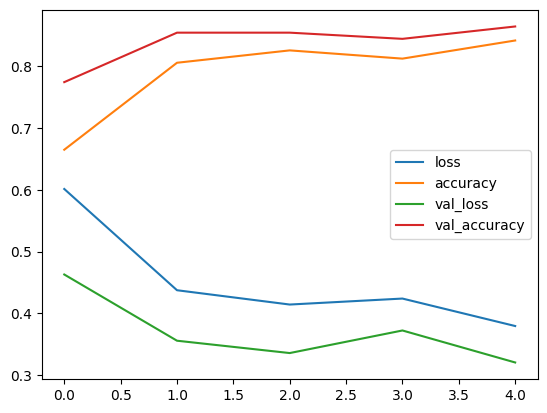

In [5]:
import pandas as pd

pd.DataFrame(history.history).plot()

In [6]:
def plot_losses(history):
    epochs = range(len(history.history["loss"]))
    plt.plot(epochs,history.history["loss"],label = "loss")
    plt.plot(epochs,history.history["val_loss"],label = "val_loss")
    plt.legend()
    plt.figure()
    plt.plot(epochs,history.history["accuracy"],label = "accuracy")
    plt.plot(epochs,history.history["val_accuracy"],label = "val_accuracy")
    plt.legend()


    

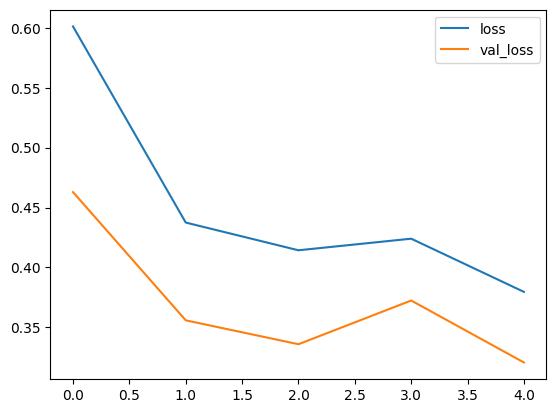

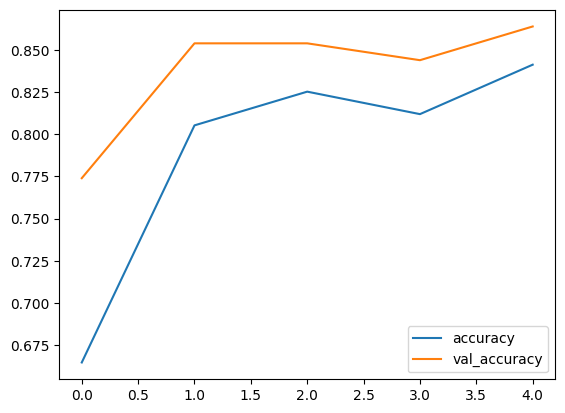

In [7]:
plot_losses(history)

In [8]:
train_datagen_aug = ImageDataGenerator(rescale = 1./255.,rotation_range = 0.2,shear_range = 0.2, zoom_range = 0.2, width_shift_range = 0.2 ,height_shift_range = 0.3, horizontal_flip = True)

train_data_aug = train_datagen_aug.flow_from_directory(train_dir,target_size = (224,224),batch_size = 32,class_mode = "binary",shuffle = False ,seed = 42) 
train_data = train_datagen.flow_from_directory(train_dir,target_size = (224,224),batch_size = 32,class_mode = "binary",shuffle = False,seed = 42)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [9]:
images , labels = train_data.next()
aug_img,aug_lab = train_data_aug.next()

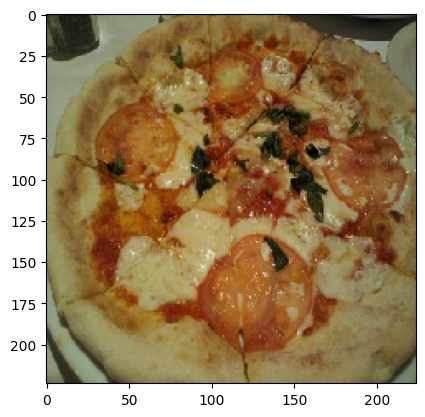

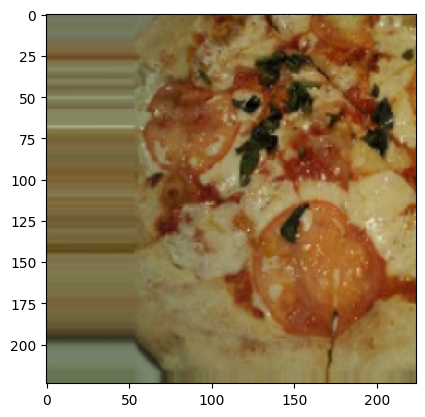

In [10]:
import random
rand_num = random.randint(0,32)
plt.imshow(images[rand_num])
plt.figure()
plt.imshow(aug_img[rand_num])

In [11]:
tf.random.set_seed(42)
model_aug = tf.keras.Sequential([
    Conv2D(filters = 10,kernel_size = 3,activation = "relu",input_shape = (224,224,3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation = "sigmoid")
])
model_aug.compile(loss = "binary_crossentropy" , optimizer = "adam",metrics = ["accuracy"])
history_aug = model_aug.fit(train_data_aug,epochs = 5,steps_per_epoch=len(train_data_aug),validation_data = test_data,validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 227ms/step - loss: 0.7128 - accuracy: 0.3353 - val_loss: 0.6931 - val_accuracy: 0.5280
Epoch 2/5
47/47 [==============================] - 10s 223ms/step - loss: 0.6923 - accuracy: 0.5327 - val_loss: 0.6869 - val_accuracy: 0.5560
Epoch 3/5
47/47 [==============================] - 11s 225ms/step - loss: 0.6943 - accuracy: 0.5493 - val_loss: 0.6919 - val_accuracy: 0.6360
Epoch 4/5
47/47 [==============================] - 11s 226ms/step - loss: 0.6909 - accuracy: 0.5693 - val_loss: 0.6851 - val_accuracy: 0.6440
Epoch 5/5
47/47 [==============================] - 11s 224ms/step - loss: 0.7163 - accuracy: 0.5847 - val_loss: 0.6856 - val_accuracy: 0.6020


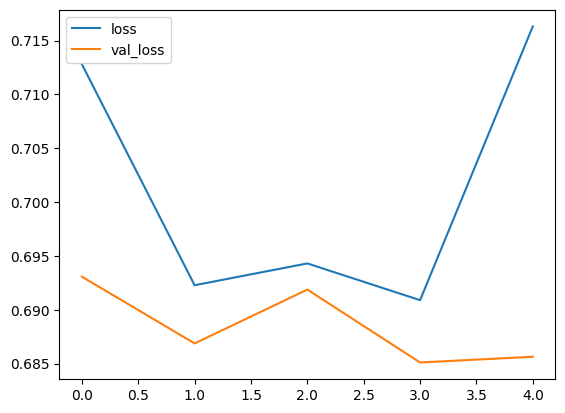

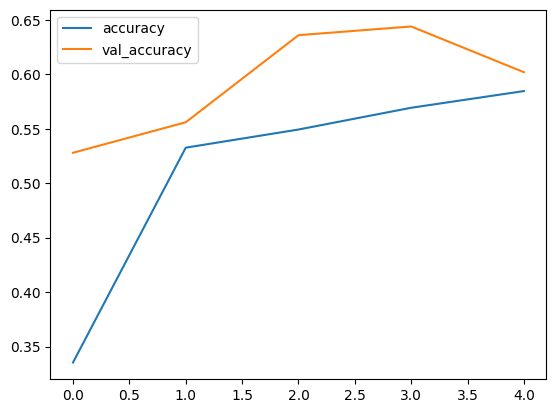

In [12]:
plot_losses(history_aug)

In [13]:
train_datagen_aug = ImageDataGenerator(rescale = 1./255.,rotation_range = 0.2,shear_range = 0.2, zoom_range = 0.2, width_shift_range = 0.2 ,height_shift_range = 0.3, horizontal_flip = True)

train_data_aug_shuf = train_datagen_aug.flow_from_directory(train_dir,target_size = (224,224),batch_size = 32,class_mode = "binary",shuffle = True ,seed = 42) 
train_data = train_datagen.flow_from_directory(train_dir,target_size = (224,224),batch_size = 32,class_mode = "binary",shuffle = True,seed = 42)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [17]:
tf.random.set_seed(42)
model_aug_shuffled = tf.keras.Sequential([
    Conv2D(filters = 10,kernel_size = 3,activation = "relu",input_shape = (224,224,3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation = "sigmoid")
])
model_aug_shuffled.compile(loss = "binary_crossentropy" , optimizer = "adam",metrics = ["accuracy"])
history_aug_shuffled = model_aug_shuffled.fit(train_data_aug_shuf,epochs = 5,steps_per_epoch=len(train_data_aug_shuf),validation_data = test_data,validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 226ms/step - loss: 0.6455 - accuracy: 0.6147 - val_loss: 0.5064 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 11s 225ms/step - loss: 0.5398 - accuracy: 0.7213 - val_loss: 0.3966 - val_accuracy: 0.8100
Epoch 3/5
47/47 [==============================] - 11s 223ms/step - loss: 0.5079 - accuracy: 0.7587 - val_loss: 0.3467 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 11s 225ms/step - loss: 0.5126 - accuracy: 0.7527 - val_loss: 0.4387 - val_accuracy: 0.7980
Epoch 5/5
47/47 [==============================] - 11s 227ms/step - loss: 0.5142 - accuracy: 0.7633 - val_loss: 0.4502 - val_accuracy: 0.7820


Text(0.5, 1.0, 'non-shuffled data')

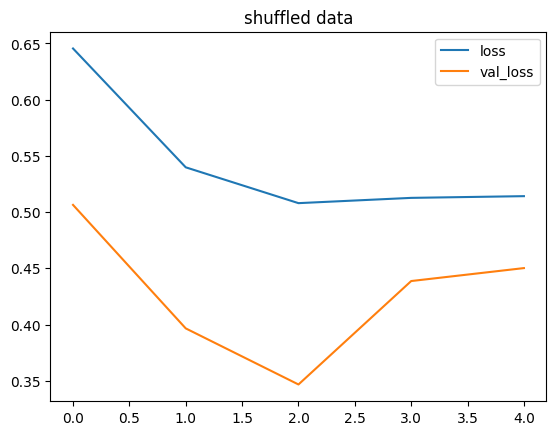

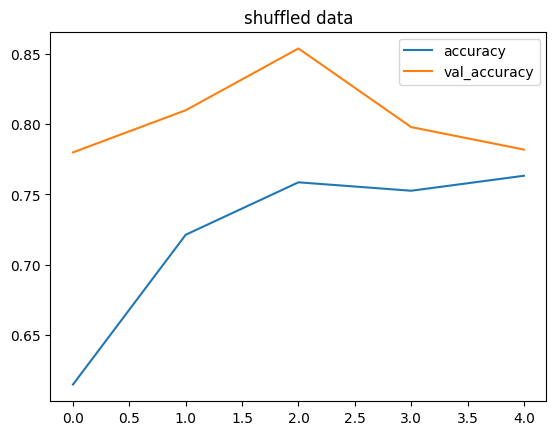

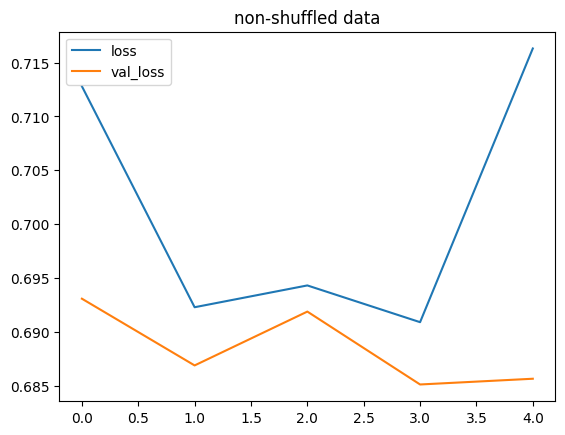

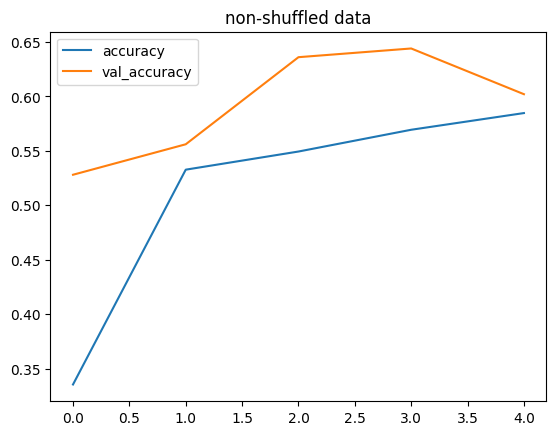

In [21]:
plt.title("shuffled data")
plot_losses(history_aug_shuffled)
plt.title("shuffled data")
plt.figure()
plt.title("non-shuffled data")
plot_losses(history_aug)
plt.title("non-shuffled data")